In [18]:
%%time
import numpy as np
import pandas as pd
import random
import math
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

CPU times: user 107 µs, sys: 12 µs, total: 119 µs
Wall time: 133 µs


In [19]:
%%time
#iris dataset
test_iris=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/1668923288_8836925_test-data-iris.txt",header=None,sep=" ")

CPU times: user 7.12 ms, sys: 2.06 ms, total: 9.18 ms
Wall time: 13.3 ms


In [25]:
%%time
def euclidean_dist(i,c):
  x=np.sum((i-c)**2)
  return np.sqrt(x)

def generate_clusters(input,centroids):
  found_centroid=[]
  for i in input:
    cal_distance=[euclidean_dist(i,c) for c in centroids]
    found_centroid.append(np.argmin(cal_distance))
  return found_centroid

def update_centroid(test,groups):
  test=pd.DataFrame(test)
  test['cluster']=groups
  new_values=[]
  unique=set(test['cluster'])
  for i in unique:
    cluster_i=test[test['cluster']==i][test.columns[:-1]]
    median=np.median(cluster_i,axis=0)
    new_values.append(median)
  return test,new_values

def check_centroid(cen,updated_cen):
  np_cen=np.array(cen)
  np_updated_cen=np.array(updated_cen)
  #print(euclidean_dist(np_cen,np_updated_cen))
  return euclidean_dist(np_cen,np_updated_cen)

def kmeans(test_np,k,iterations):
  #np.random.seed(13)
  centroids=[]
  centroids=[test_np[i] for i in random.sample(range(0,len(test_np)),k)]
  print("Initial centroids",centroids)
  np.array(centroids)
  for i in range(iterations):
    clusters_values=generate_clusters(test_np,centroids)
    updated_test,updated_centres=update_centroid(test_np,clusters_values)
    if check_centroid(centroids,updated_centres)==0:
      print(i)
      break
    else:
      centroids=updated_centres
  return updated_test,centroids

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 12.2 µs


In [22]:
%%time
pca=PCA(n_components=2)
transformed_test=pca.fit_transform(test_iris)

CPU times: user 4.87 ms, sys: 0 ns, total: 4.87 ms
Wall time: 8.06 ms


In [23]:
tsne=TSNE(n_components=2,n_iter=1000,n_jobs=-1,random_state=42)
test_tsne=tsne.fit_transform(transformed_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [24]:
%%time
count=np.arange(2,21,2)
list_of_errors=[]
for i in count:
  df,centroids=kmeans(test_tsne,i,100)
  total_error=0
  x=len(centroids)
  for k in range(x):
    error=0
    current=df[df['cluster']==k][df.columns[:-1]]
    for line,i in current.iterrows():
      error=error+np.round(euclidean_dist(centroids[k],i))
      total_error+=error
  list_of_errors.append(total_error)

CPU times: user 2.55 s, sys: 11.4 ms, total: 2.56 s
Wall time: 2.52 s


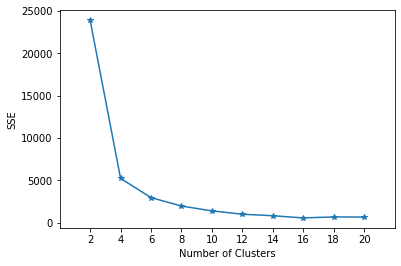

CPU times: user 132 ms, sys: 3.06 ms, total: 136 ms
Wall time: 138 ms


In [14]:
%%time
plt.figure()
plt.xlim(0,22)
steps = [2,4,6,8,10,12,14,16,18,20]
plt.plot(count,list_of_errors,marker='*')
plt.xticks(count,steps)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [26]:
df,centroids=kmeans(test_tsne,3,80)
clusters=df['cluster']+1

Initial centroids [array([-13.686082, -11.736458], dtype=float32), array([ -6.933221, -11.157872], dtype=float32), array([-11.727853, -12.008156], dtype=float32)]
5


In [17]:
file=open("/content/drive/MyDrive/Colab Notebooks/output_irismediantsne.txt",'w')
for i in clusters:
  file.write(str(i))
  file.write("\n")
file.close()